### Linear Regression: Bike Sharing Dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
dataset = pd.read_csv('day.csv')

In [37]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
dataset=dataset.drop('instant',axis=1)

In [39]:
dataset.head(4)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562


In [40]:
dataset.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [42]:
X = dataset.drop(['cnt','dteday'],axis=1)
Y = dataset['cnt']

In [43]:
X.shape

(731, 13)

In [44]:
Y.shape

(731,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.33,random_state=5)

In [47]:
train_X.shape

(489, 13)

In [48]:
test_X.shape

(242, 13)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
predict_train = lm.predict(train_X)
predict_test = lm.predict(test_X)

In [56]:
print("Calculate MSE with X_train and Y_train: %.2f"  % np.mean((train_Y - predict_train) ** 2))
    
print("Calculate MSE with X_test and Y_test: %.2f"  %np.mean((test_Y - predict_test) ** 2))

Calculate MSE with X_train and Y_train: 0.00
Calculate MSE with X_test and Y_test: 0.00


Text(0.5, 1.0, 'Counts vs Trained Predicted Counts')

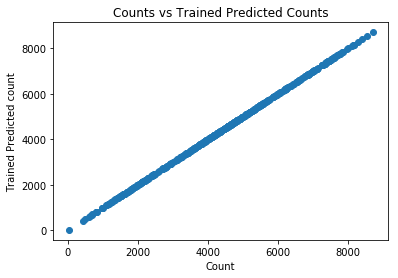

In [58]:
plt.scatter(train_Y, predict_train)

plt.xlabel("Count")
plt.ylabel("Trained Predicted count")
plt.title("Counts vs Trained Predicted Counts")